Group Members:
- Ali Alavizadeh
- Ali Janloo
- Amir Ali Akhgari

Momentum is a technique used to accelerate the convergence of gradient descent algorithms. It helps to avoid oscillations and improve the speed of learning by incorporating the concept of velocity from physics.

### Gradient Descent with Momentum

1. **Gradient Descent Overview**:
   - Gradient descent is an optimization algorithm used to minimize the cost function by updating the model parameters iteratively. The standard gradient descent update rule is:
     $$
     \theta = \theta - \alpha \nabla J(\theta)
     $$
     where $\theta$ represents the model parameters, $\alpha$ is the learning rate, and $\nabla J(\theta)$ is the gradient of the cost function $J$ with respect to $\theta$.

2. **Momentum Introduction**:
   - Momentum modifies the standard gradient descent by **adding a fraction of the previous update** to the current update. This helps to **smooth out the updates**, leading to faster convergence and reduced oscillations.
   - The momentum update rule is:
     $$
     v_t = \beta v_{t-1} + (1 - \beta) \nabla J(\theta_t)
     $$
     $$
     \theta_{t+1} = \theta_t - \alpha v_t
     $$
     where $v_t$ is the velocity (or exponentially weighted average of gradients), $\beta$ is the momentum coefficient (typically between 0 and 1), and $\alpha$ is the learning rate.

### How Momentum Works

- **Velocity**:
  - Velocity $v_t$ accumulates the gradients of the past steps, effectively adding a fraction of the previous gradient to the current one.
  - This accumulation helps to build up speed in directions with consistent gradients, while dampening updates in directions with fluctuating gradients.

- **Momentum Coefficient ($\beta$)**:
  - $\beta$ controls the influence of past gradients. A higher $\beta$ (e.g., 0.9) gives more weight to past gradients, resulting in smoother updates.

### Algorithm Steps

1. **Initialization**:
   - Initialize the parameters $\theta$ and the velocity $v$ (usually $v$ is initialized to zero.

2. **Iteration**:
   - For each iteration $t$:
     - Compute the gradient of the cost function at the current parameters: $\nabla J(\theta_t)$.
     - Update the velocity: $v_t = \beta v_{t-1} + (1 - \beta) \nabla J(\theta_t)$.
     - Update the parameters: $\theta_{t+1} = \theta_t - \alpha v_t$.

3. **Convergence**:
   - Repeat the iterations until convergence, i.e., when the changes in the cost function or the parameters are below a certain threshold.

### Advantages of Using Momentum

- **Faster Convergence**:
  - Momentum helps to accelerate gradient descent by moving more quickly in the relevant direction, leading to faster convergence.

- **Reduced Oscillations**:
  - By smoothing the updates, momentum reduces oscillations, especially in regions where the gradient direction changes frequently.

- **Escaping Local Minima**:
  - The accumulated velocity can help the algorithm escape local minima or shallow regions of the cost function landscape.



### Conclusion

Momentum in machine learning optimizes the convergence of gradient descent by incorporating past gradients into the current update. This technique significantly improves the efficiency and stability of the training process, especially for deep learning models. Using momentum can help achieve faster convergence and better performance in various optimization tasks.

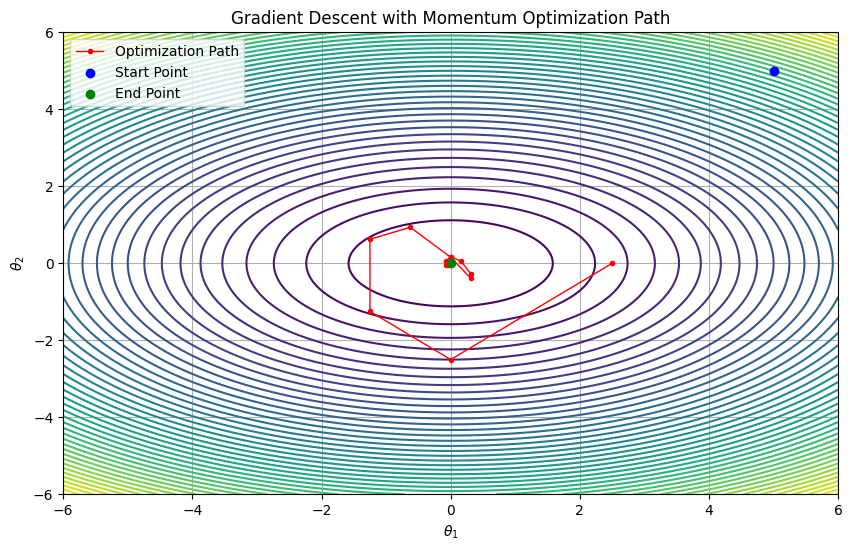

Optimal theta: [-4.44089210e-15 -1.64115109e-15]


In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Define the quadratic function
def cost_function(theta):
    return theta[0]**2 + 2*theta[1]**2

# Define the gradient of the function
def gradient(theta):
    return np.array([2*theta[0], 4*theta[1]])

# Gradient descent with momentum
def gradient_descent_with_momentum(theta, gradient_func, alpha, beta, num_iters):
    v = np.zeros_like(theta)
    history = []
    for _ in range(num_iters):
        grad = gradient_func(theta)
        v = beta * v + (1 - beta) * grad
        theta = theta - alpha * v
        history.append(theta.copy())
    return theta, history

# Initialize parameters
theta_initial = np.array([5.0, 5.0])  # Starting point
alpha = 0.9  # Learning rate
beta = 0.5  # Momentum coefficient
num_iters = 100

# Perform gradient descent with momentum
theta_optimal, history = gradient_descent_with_momentum(theta_initial, gradient, alpha, beta, num_iters)

# Extract the path
path = np.array(history)

# Plot the optimization path
X, Y = np.meshgrid(np.linspace(-6, 6, 400), np.linspace(-6, 6, 400))
Z = X**2 + 2*Y**2

plt.figure(figsize=(10, 6))
plt.contour(X, Y, Z, levels=50)
plt.plot(path[:, 0], path[:, 1], 'r-o', markersize=3, linewidth=1, label='Optimization Path')
plt.scatter(theta_initial[0], theta_initial[1], color='blue', label='Start Point', zorder=5)
plt.scatter(theta_optimal[0], theta_optimal[1], color='green', label='End Point', zorder=5)
plt.title('Gradient Descent with Momentum Optimization Path')
plt.xlabel(r'$\theta_1$')
plt.ylabel(r'$\theta_2$')
plt.legend()
plt.grid()
plt.show()

print("Optimal theta:", theta_optimal)
